In [3]:
import pandas as pd
import numpy as np
import os

In [4]:
def getinfo(folders):
    excelfile = os.path.join(folders['main'],folders['excel'])
    info = pd.read_excel(f"{excelfile}", convert_float=True)
    info.columns = map(str.lower, info.columns)
#     info.set_index('scan', inplace=True)
    # info = info.append({'animal-id': 'folder'}, ignore_index=True)

    # def get_subject_folders(main_folder, info):
    #     for animal in info.columns

#     info = find_animal_folders(info, folders['raw'])
    return(info)
                         

In [5]:
folders = {}
folders['main'] = '/mnt/c/Users/felix/OneDrive/WORK/2019ETH/Analysis'   
folders['excel'] = 'WM_GM_ROI_data.xlsx'

,rat id,acquisition/scan,location estimate,slice number,cs horizontal mm,cs vertical,area cm2 gm,area pu gm,rm gm,sd gm,minimum gm,maximum gm,area cm2 wm,area pu wm,rm wm,sd wm,minimum wm,maximum wm,unnamed: 18
0,(#1) sev_20181218_198,T1 E8,T6,12.0,2.84,2.68,0.02,269.0,1650.0,138.00,1450.0,2560.0,0.05,643.0,1690.0,274.0,0.0,4650.0,NaN
1,NaN,T2 E9,T6,12.0,NaN,NaN,0.02,380.0,51.8,6.76,0.0,67.4,0.05,954.0,55.9,11.5,0.0,175.0,NaN
2,(#1) sev_20181219_198,T1 E7,T6,12.0,2.95,2.42,0.02,242.0,1560.0,140.00,692.0,2220.0,0.06,716.0,1490.0,337.0,0.0,3080.0,NaN
3,NaN,T2 E8,T6,12.0,NaN,NaN,0.02,391.0,102.0,49.80,0.0,359.0,0.05,974.0,131.0,76.2,0.0,611.0,NaN
4,(#1) mod_20181128_210,T1 E7,T6,28.0,3.05,2.35,0.02,228.0,1540.0,352.00,0.0,2620.0,0.05,663.0,1250.0,424.0,0.0,3180.0,NaN
5,NaN,T2 E8,T6,28.0,NaN,NaN,0.02,379.0,189.0,215.00,0.0,1120.0,0.05,895.0,286.0,309.0,0.0,1460.0,NaN
6,(#1) mod_20181129_210_2,T1 E7,C6,21.0,4.27,2.58,0.04,483.0,1690.0,131.00,331.0,2110.0,0.08,1044.0,1600.0,193.0,0.0,2470.0,NaN
7,NaN,T2 E8,C6,21.0,NaN,NaN,0.04,742.0,67.6,19.10,0.0,278.0,0.07,1453.0,92.5,45.0,0.0,833.0,artifacts in white matter
8,(#2) mod_20181203_213,T1 E7,T6,23.0,2.54,2.19,0.01,187.0,1800.0,134.00,1420.0,2340.0,0.04,529.0,1710.0,224.0,0.0,3310.0,NaN
9,NaN,T2 E8,T6,23.0,NaN,NaN,0.02,318.0,59.3,15.90,0.0,254.0,0.04,807.0,64.9,38.1,0.0,631.0,NaN


In [24]:
df = getinfo(folders)

# cleanup

df[df['rat id']==""] = np.NaN
df = df.fillna(method='ffill')


split = df['rat id'].str.split("_", n=2, expand=True)
del df['rat id']
df['group'] = split[0]
df['date'] = split[1]
df['id'] = split[2]

split = df['acquisition/scan'].str.split(" ", expand=True)
del df['acquisition/scan']
df['acquisition'] = split[0]
df['scan'] = split[1]

df['group'].replace(regex=True,inplace=True,to_replace='.* ',value=r'')  # gives sham/sev/mod group (without the meanignless number)



df.columns = [c.replace(' ', '_') for c in df.columns]




df


# df['group'].str.split(" ", expand=True)

# data['result'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

# x = df['rat id'].str.split("_", n=2, expand=True)


,location_estimate,slice_number,cs_horizontal_mm,cs_vertical,area_cm2_gm,area_pu_gm,rm_gm,sd_gm,minimum_gm,maximum_gm,...,rm_wm,sd_wm,minimum_wm,maximum_wm,unnamed:_18,group,date,id,acquisition,scan
0,T6,12.0,2.84,2.68,0.02,269.0,1650.0,138.00,1450.0,2560.0,...,1690.0,274.0,0.0,4650.0,NaN,sev,20181218,198,T1,E8
1,T6,12.0,2.84,2.68,0.02,380.0,51.8,6.76,0.0,67.4,...,55.9,11.5,0.0,175.0,NaN,sev,20181218,198,T2,E9
2,T6,12.0,2.95,2.42,0.02,242.0,1560.0,140.00,692.0,2220.0,...,1490.0,337.0,0.0,3080.0,NaN,sev,20181219,198,T1,E7
3,T6,12.0,2.95,2.42,0.02,391.0,102.0,49.80,0.0,359.0,...,131.0,76.2,0.0,611.0,NaN,sev,20181219,198,T2,E8
4,T6,28.0,3.05,2.35,0.02,228.0,1540.0,352.00,0.0,2620.0,...,1250.0,424.0,0.0,3180.0,NaN,mod,20181128,210,T1,E7
5,T6,28.0,3.05,2.35,0.02,379.0,189.0,215.00,0.0,1120.0,...,286.0,309.0,0.0,1460.0,NaN,mod,20181128,210,T2,E8
6,C6,21.0,4.27,2.58,0.04,483.0,1690.0,131.00,331.0,2110.0,...,1600.0,193.0,0.0,2470.0,NaN,mod,20181129,210_2,T1,E7
7,C6,21.0,4.27,2.58,0.04,742.0,67.6,19.10,0.0,278.0,...,92.5,45.0,0.0,833.0,artifacts in white matter,mod,20181129,210_2,T2,E8
8,T6,23.0,2.54,2.19,0.01,187.0,1800.0,134.00,1420.0,2340.0,...,1710.0,224.0,0.0,3310.0,artifacts in white matter,mod,20181203,213,T1,E7
9,T6,23.0,2.54,2.19,0.02,318.0,59.3,15.90,0.0,254.0,...,64.9,38.1,0.0,631.0,artifacts in white matter,mod,20181203,213,T2,E8


In [25]:
df.columns

Index(['location_estimate', 'slice_number', 'cs_horizontal_mm', 'cs_vertical',
       'area_cm2_gm', 'area_pu_gm', 'rm_gm', 'sd_gm', 'minimum_gm',
       'maximum_gm', 'area_cm2_wm', 'area_pu_wm', 'rm_wm', 'sd_wm',
       'minimum_wm', 'maximum_wm', 'unnamed:_18', 'group', 'date', 'id',
       'acquisition', 'scan'],
      dtype='object')

In [26]:
df.loc[1,'location_estimate']

'T6'

In [36]:
# Select subset of data for analysis

columns = ['group','rm_gm','area_pu_gm','area_pu_wm','rm_wm']

selected_rows = df[(df['location_estimate'] == 'T6') & (df['acquisition'] == 'T2')]

df_selection = selected_rows[columns]

df_selection

,group,rm_gm,area_pu_gm,area_pu_wm,rm_wm
1,sev,51.8,380.0,954.0,55.9
3,sev,102.0,391.0,974.0,131.0
5,mod,189.0,379.0,895.0,286.0
9,mod,59.3,318.0,807.0,64.9
15,mod,52.8,328.0,963.0,60.0
17,sev,54.5,356.0,1017.0,59.4
21,sham,59.5,340.0,1112.0,67.3
25,sham,58.3,362.0,998.0,66.0
29,mild,50.3,344.0,973.0,49.9
33,mild,56.3,328.0,1036.0,54.1


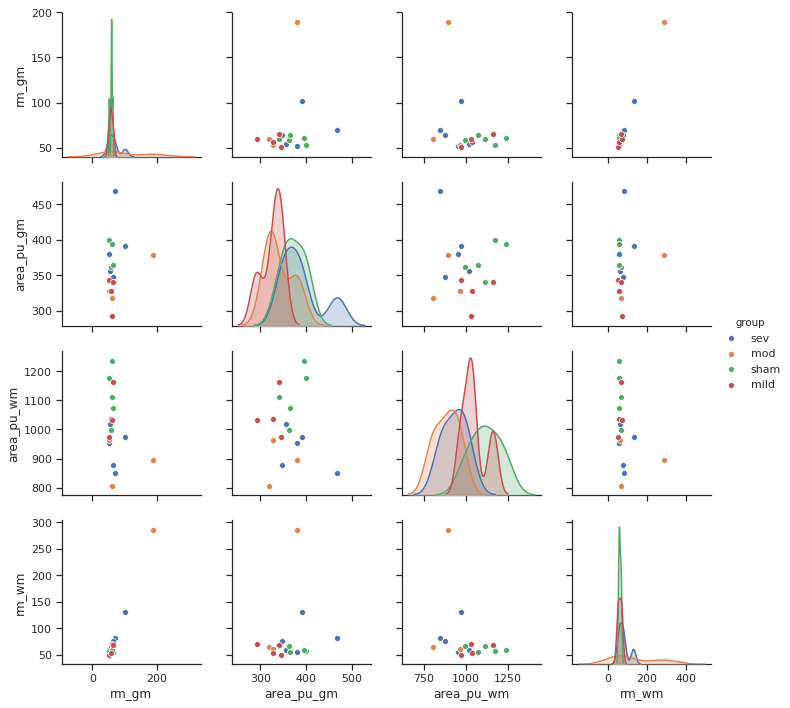

In [37]:
import seaborn as sns
%matplotlib inline


sns.set(style="ticks")
sns.pairplot(df_selection, hue="group")

In [32]:
# statsmodels doesnt work for this kind of data... see mord or sklearn...
# https://stackoverflow.com/questions/38549756/how-can-i-do-ordinal-regression-using-the-mord-module-in-python

import statsmodels.api as sm
from patsy import dmatrices


# df_selection = df_selection.dropna()

y, X = dmatrices("group ~ rm_gm + area_pu_gm + area_pu_wm + rm_wm", data=df_selection, NA_action='drop', return_type='dataframe')


mod = sm.OLS(y, X) # Describe model

res = mod.fit()  # Fit model

print(res.summary())  #Summarize model

/home/felix/miniconda3/envs/python37/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


ValueError: shapes (16,4) and (16,4) not aligned: 4 (dim 1) != 16 (dim 0)